In [31]:
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.style as style 
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')


In [32]:
# load data
#completedataframe=pd.read_csv("emissions.csv")
#x1 = completedatafrage.loc[df.cut=='*shap', 'energy_consumed']
#x2 = completedataframe.loc[df.cut=='*reduction', 'energy_consumed']
gliomashapdata=pd.read_csv("results-export-eubuntu-kmac-lmac-glioma-shap.csv", delimiter=',')
gliomareddata=pd.read_csv("results-export-eubuntu-kmac-lmac-glioma-reduction.csv", delimiter=',')
energyefficiencyshapdata=pd.read_csv("results-export-eubuntu-kmac-lwin-energyeffds-shap.csv", delimiter=',')
energyefficiencyreddata=pd.read_csv("results-export-eubuntu-kmac-lwin-energyeffds-reduction.csv", delimiter=',')
yolo5shapdata=pd.read_csv("results-export-eubuntu-kmac-lwin-yolo5-shap.csv", delimiter=',')
yolo5reddata=pd.read_csv("results-export-eubuntu-kmac-lwin-yolo5-reduction.csv", delimiter=',')

#print(gliomashapdata['energy_consumed'])
#pd.set_option('display.float_format', np.format_float_scientific)
pd.set_option('display.float_format', np.format_float_positional)

print("val with shap.: \n===============\n", gliomashapdata['energy_consumed'].to_string(index=False))
#print(gliomashapdata['energy_consumed'], sample_1) #"{:e}".format(

print("\nval with feature red.: \n=======================\n", gliomareddata['energy_consumed'].to_string(index=False))


val with shap.: 
 0.0014987836962012
0.0017288849682877
 0.001572385875362
0.0022639393211848
0.0018488496971619
0.0020264083177325
0.0006905861892765
0.0007290966033096
 0.000768510434017

val with feature red.: 
 0.0021671130217427
0.0024409046321913
0.0026037060619044
0.0030646042344537
0.0031702089118046
0.0030901138731752
0.0007088338399805
0.0007340767307141
0.0007855361486612


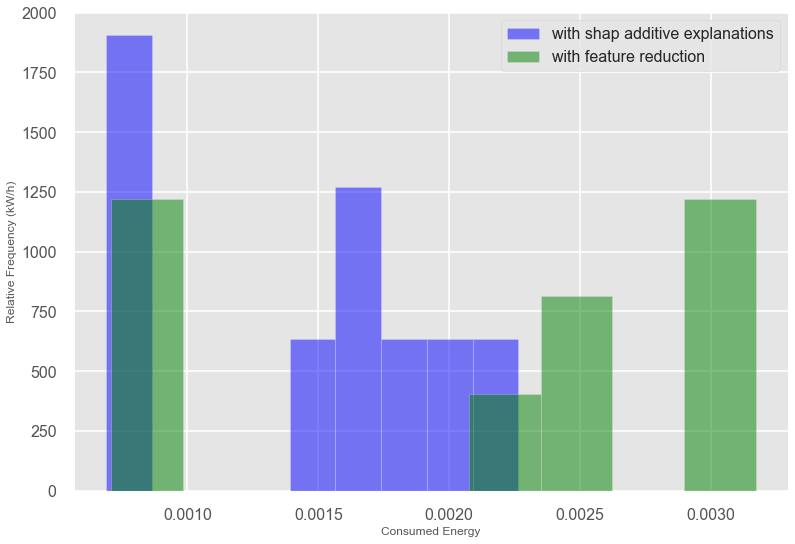

In [33]:
#testsample_1=[0.1, 0.1, 0.1, 0.2, 0.2, 0.3, 0.4, 0.5, 0.6]
#testsample_2=[0.4, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.7, 0.7]
plt.hist(gliomashapdata['energy_consumed'], density = 1, color ='blue', alpha=0.5, bins=9, label = 'with shap additive explanations')
plt.hist(gliomareddata['energy_consumed'], density = 1, color ='green', alpha=0.5, bins=9, label = 'with feature reduction')
plt.xlabel('Consumed Energy')
plt.ylabel('Relative Frequency (kW/h)')
plt.legend(loc='upper right')

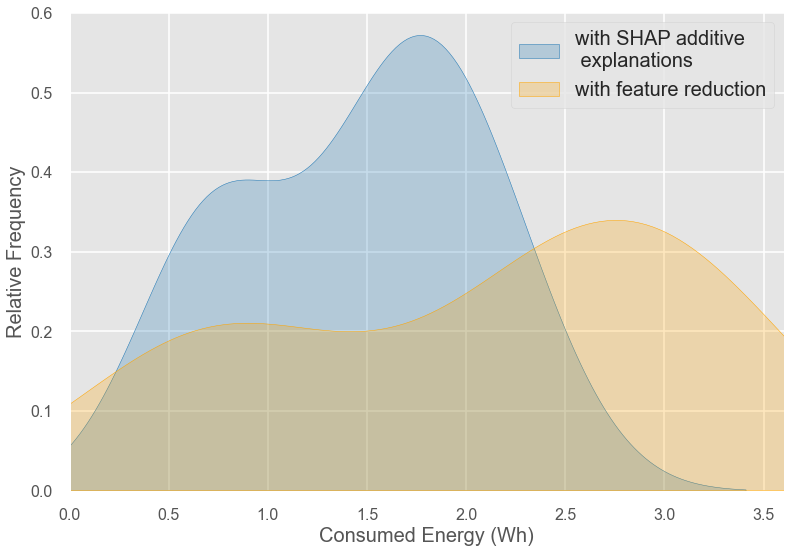

In [34]:
ec1 = gliomashapdata['energy_consumed'].apply(lambda x: x*1000)
ec2 = gliomareddata['energy_consumed'].apply(lambda x: x*1000)

sns.kdeplot(ec1, label='with SHAP additive \n explanations', color="#1f77b4", shade=True).set(xlim=(0))
sns.kdeplot(ec2, label='with feature reduction', color="orange", shade=True).set(xlim=(0))
#ax= sns.distplot(sample_1)
#ax = sns.distplot(sample_2)
#sns.distplot(x).set(xlim=(0))
plt.xlabel('Consumed Energy (Wh)', fontsize=20)
plt.ylabel('Relative Frequency', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
#plt.title("Glioma Classification Consumed Energy Distribution of three different hardware settings\n (i7-4770HQ CPU @ 2.20GHz, i7-8700K CPU @ 3.70GHz, i5-11300H @ 3.10GHz)")
#Note that the y-axis is in terms of relative frequency and not the number of data points falling into the range. 
#The density curve has two distinct peaks indicating the distribution is twomodal - two computers quite similar but another different.

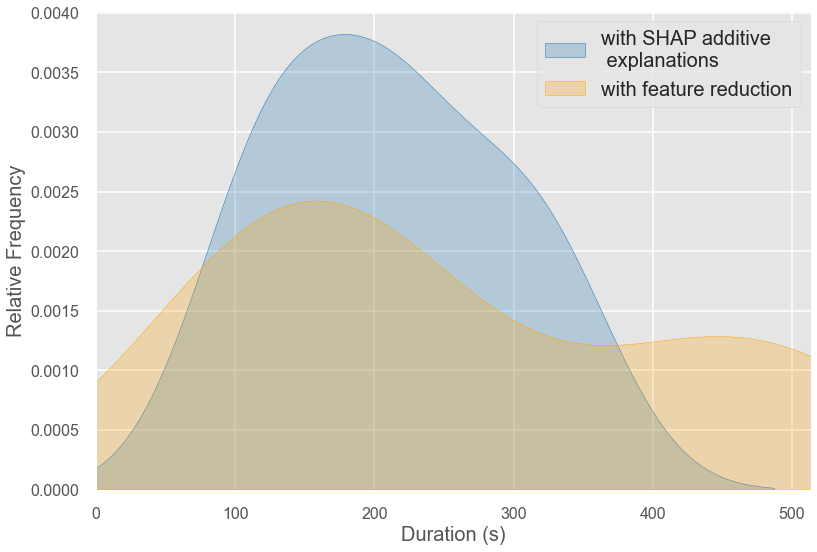

In [35]:
sns.kdeplot(gliomashapdata['duration'].values, label='with SHAP additive \n explanations', color="#1f77b4", shade=True).set(xlim=(0))
sns.kdeplot(gliomareddata['duration'].values, label='with feature reduction', color="orange", shade=True).set(xlim=(0))
#ax= sns.distplot(sample_1)
#ax = sns.distplot(sample_2)
plt.xlabel('Duration (s)', fontsize=20)
plt.ylabel('Relative Frequency', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
#plt.title("Glioma Classification Duration Distribution of three different hardware settings\n (i7-4770HQ CPU @ 2.20GHz, i7-8700K CPU @ 3.70GHz, i5-11300H @ 3.10GHz)")

Text(0.5, 1.0, 'Sample distribution of three different hardware settings\n (i7-4770HQ CPU @ 2.20GHz, i7-8700K CPU @ 3.70GHz, i5-11300H @ 3.10GHz)')

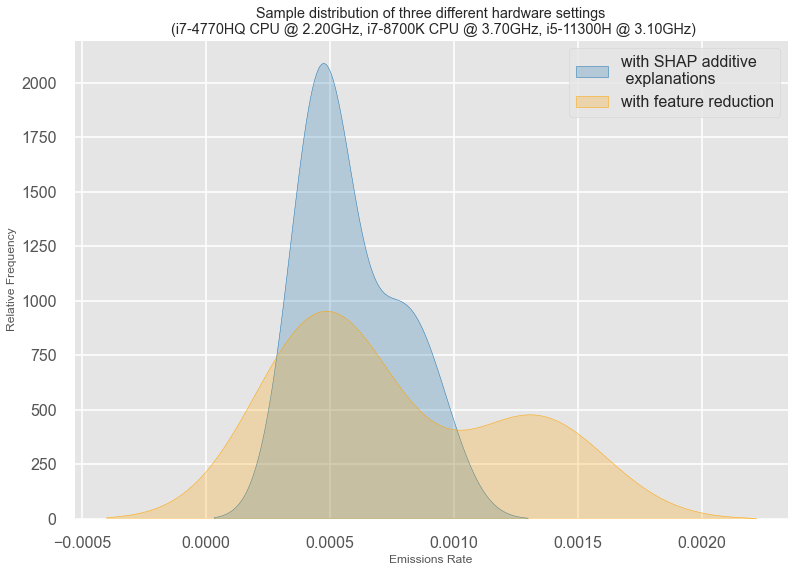

In [36]:
sns.kdeplot(gliomashapdata['emissions_rate'].values, label='with SHAP additive \n explanations', color="#1f77b4", shade=True)
sns.kdeplot(gliomareddata['emissions_rate'].values, label='with feature reduction', color="orange", shade=True)
#ax= sns.distplot(sample_1)
#ax = sns.distplot(sample_2)
plt.xlabel('Emissions Rate')
plt.ylabel('Relative Frequency')
plt.legend(loc='upper right')
plt.title("Sample distribution of three different hardware settings\n (i7-4770HQ CPU @ 2.20GHz, i7-8700K CPU @ 3.70GHz, i5-11300H @ 3.10GHz)")

Text(0.5, 1.0, 'Sample distribution of three different hardware settings\n (i7-4770HQ CPU @ 2.20GHz, i7-8700K CPU @ 3.70GHz, i5-11300H @ 3.10GHz)')

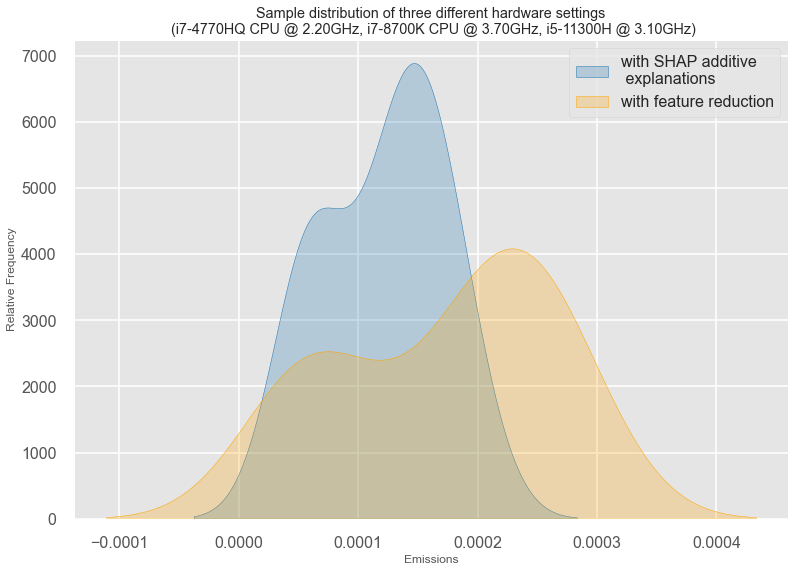

In [37]:
sns.kdeplot(gliomashapdata['emissions'].values, label='with SHAP additive \n explanations', color="#1f77b4", shade=True)
sns.kdeplot(gliomareddata['emissions'].values, label='with feature reduction', color="orange", shade=True)
#ax= sns.distplot(sample_1)
#ax = sns.distplot(sample_2)
plt.xlabel('Emissions')
plt.ylabel('Relative Frequency')
plt.legend(loc='upper right')
plt.title("Sample distribution of three different hardware settings\n (i7-4770HQ CPU @ 2.20GHz, i7-8700K CPU @ 3.70GHz, i5-11300H @ 3.10GHz)")

Text(0.5, 1.0, 'Sample distribution of three different hardware settings\n for Energy Efficiency model')

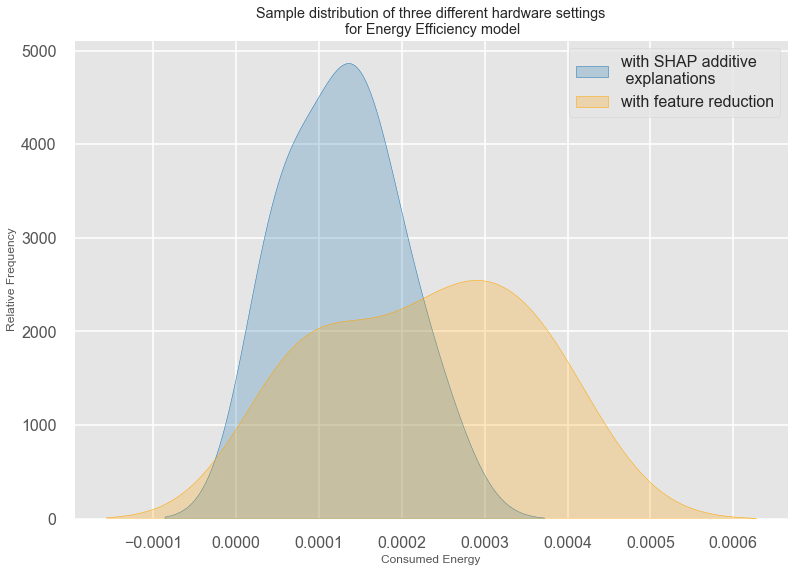

In [38]:
sns.kdeplot(energyefficiencyshapdata['energy_consumed'].values, label='with SHAP additive \n explanations', color="#1f77b4", shade=True)
sns.kdeplot(energyefficiencyreddata['energy_consumed'].values, label='with feature reduction', color="orange", shade=True)
#ax= sns.distplot(sample_1)
#ax = sns.distplot(sample_2)
plt.xlabel('Consumed Energy')
plt.ylabel('Relative Frequency')
plt.legend(loc='upper right')
plt.title("Sample distribution of three different hardware settings\n for Energy Efficiency model")

In [39]:
#todo: with other values of energy effiency just copy paste above and change column name and label respectively
#note: yolo5 model data distribution figures are not really good, because shap has much larger values than feature reduction

In [40]:
#kwargs = dict(alpha=0.5, bins=100)
#plt.hist(sample_1, **kwargs, color='g', label='with SHAP')
#plt.hist(sample_2, **kwargs, color='b', label='with feature reduction')
#plt.gca().set(title='Frequency Histogram of Consumed Energy by Glioma Classification Computation on PC with Ubuntu', ylabel='Frequency')
#plt.legend();

In [41]:
sample_1 = gliomashapdata['energy_consumed']
sample_2 = gliomareddata['energy_consumed']
variance_sample1 = np.round(np.var(sample_1),7)
variance_sample2 = np.round(np.var(sample_2),7)
print("variance of sample_1:", variance_sample1)
print("variance of sample_2:", variance_sample2)
print("ratio between variances: ", variance_sample1/variance_sample2)
if variance_sample1/variance_sample2 < 4:
    print("ratio < 4 - therefore we take the students ttest for equal var.")
else:
    print("ratio > 4 - therefore we take the welchs ttest for unequal var.")
        
# calculate a mean for sample and variance for both the variance
sample1_bar, sample2_bar = np.mean(sample_1), np.mean(sample_2)
n1, n2 = len(sample_1), len(sample_2)
var_sample1, var_sample2= np.var(sample_1, ddof=1), np.var(sample_2, ddof=1) #ddof=Delta Degrees of Freedom
# pooled sample variance
var = ( ((n1-1)*var_sample1) + ((n2-1)*var_sample2) ) / (n1+n2-2)
# standard error
std_error = np.sqrt(var * (1.0 / n1 + 1.0 / n2))
 
print("sample_1 mean:",np.round(sample1_bar,4))
print("sample_2 mean:",np.round(sample2_bar,4))
#print("variance of sample_1:",np.round(var_sample1,7))
#print("variance of sample_2:",np.round(var_sample2,7))
#print("pooled sample variance:",var)
print("standard error:",std_error)

# Perform the two sample t-test with equal variances with other method
t, p = stats.ttest_ind(a=sample_1, b=sample_2, equal_var=True) #True
#alpha = 0.05
print("t statistic:", t)
print("p value:", p)                        

variance of sample_1: 3e-07
variance of sample_2: 1e-06
ratio between variances:  0.3
ratio < 4 - therefore we take the students ttest for equal var.
sample_1 mean: 0.0015
sample_2 mean: 0.0021
standard error: 0.0004042583939065631
t statistic: -1.5495183930408902
p value: 0.14080898443377907


In [42]:
# calculate t statistics
t = abs(sample1_bar - sample2_bar) / std_error
print('t statistic:',t)

# two-tailed critical value at alpha = 0.05
t_c = stats.t.ppf(q=0.975, df=12)
print("Critical value for t two tailed:",t_c)
 
# one-tailed critical value at alpha = 0.05
#t_c = stats.t.ppf(q=0.95, df=12)
#print("Critical value for t one tailed:",t_c)
 
# get two-tailed p value
p_two = 2*(1-stats.t.cdf(x=t, df=12))
print("p-value for two tailed:",p_two)

# get one-tailed p value
#p_one = 1-stats.t.cdf(x=t, df=12)
#print("p-value for one tailed:",p_one)

#P value tells how close to extreme the data actually is.
#P value and alpha values are compared to establish the statistical significance.
#If p value <= alpha we reject the null hypothesis and say that the data is statistically significant.
#otherwise we accept the null hypothesis.

t statistic: 1.5495183930408898
Critical value for t two tailed: 2.1788128296634177
p-value for two tailed: 0.14721665570174758


In [43]:
# another method for t stats
#!pip install pingouin
#import pingouin as pg
#result = pg.ttest(sample_1,
#                  sample_2,
#                  correction=True)
# Print the result
#print(result)

In [44]:
#test for homogeneity of variances
stats.levene(sample_1,sample_2)

LeveneResult(statistic=2.091402042222065, pvalue=0.16743490184088305)

Text(0, 0.5, 'Consumed Energy (kW/h)')

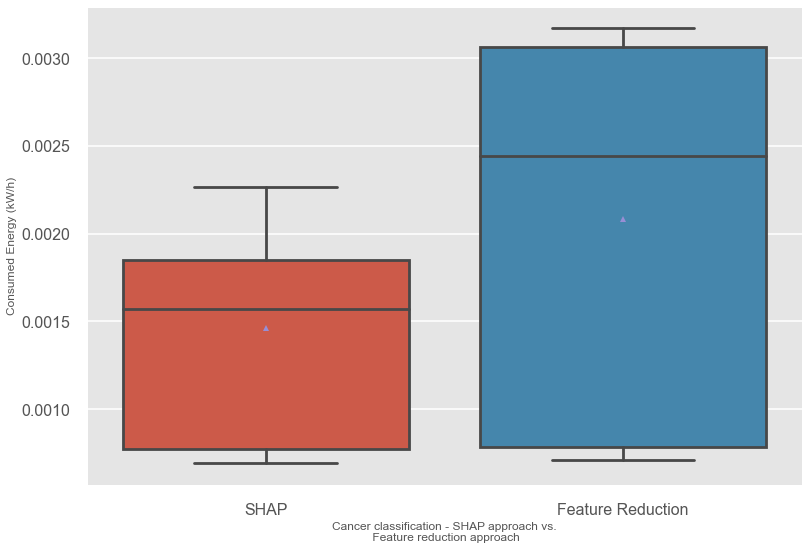

In [45]:
#visualize glioma data using boxplots:
gcombined = pd.concat([gliomashapdata['energy_consumed'], gliomareddata['energy_consumed']], axis=1, ignore_index=True, sort=False)
gcombined.columns =['SHAP', 'Feature Reduction']
sns.boxplot(data=gcombined, showmeans=True)
plt.xlabel('Cancer classification - SHAP approach vs.\n Feature reduction approach')
plt.ylabel('Consumed Energy (kW/h)')


Text(0, 0.5, 'Consumed Energy (kW/h)')

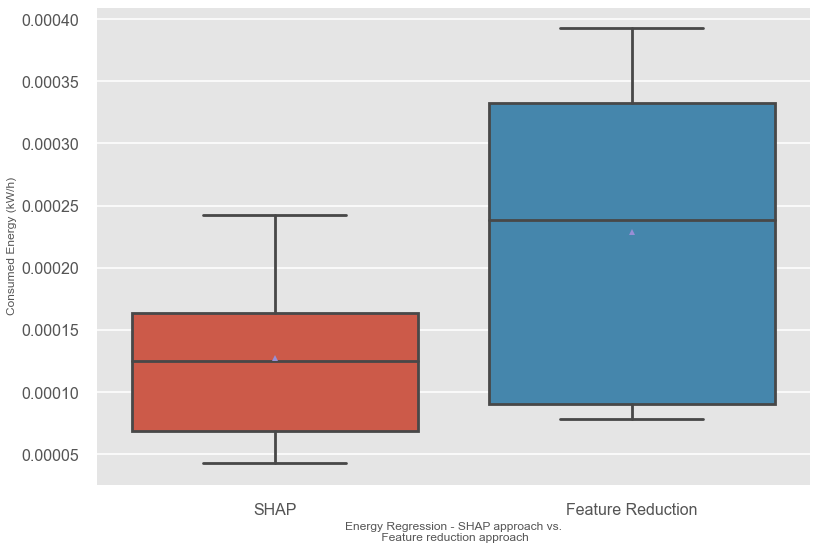

In [46]:
#visualize energy efficiency data using boxplots:
eecombined = pd.concat([energyefficiencyshapdata['energy_consumed'], energyefficiencyreddata['energy_consumed']], axis=1, ignore_index=True, sort=False)
eecombined.columns =['SHAP', 'Feature Reduction']
sns.boxplot(data=eecombined, showmeans=True)
plt.xlabel('Energy Regression - SHAP approach vs.\n Feature reduction approach')
plt.ylabel('Consumed Energy (kW/h)')


                SHAP       Feature Reduction
0 0.0046808496357055 0.000015107363338750994
1 0.0045861826727418 0.000013225098896923677
2 0.0048090184000464  0.00001353599734614526
3  0.008602629500942  0.00003875268504898306
4 0.0079949250742151  0.00004239325619520413
5 0.0080472105922803  0.00005260523930706912
6 0.0126362852699779  0.00003623374593687692
7 0.0127054372805152  0.00004899093702464901
8 0.0118095432083353  0.00003845941563417148


Text(0, 0.5, 'Consumed Energy (kW/h)')

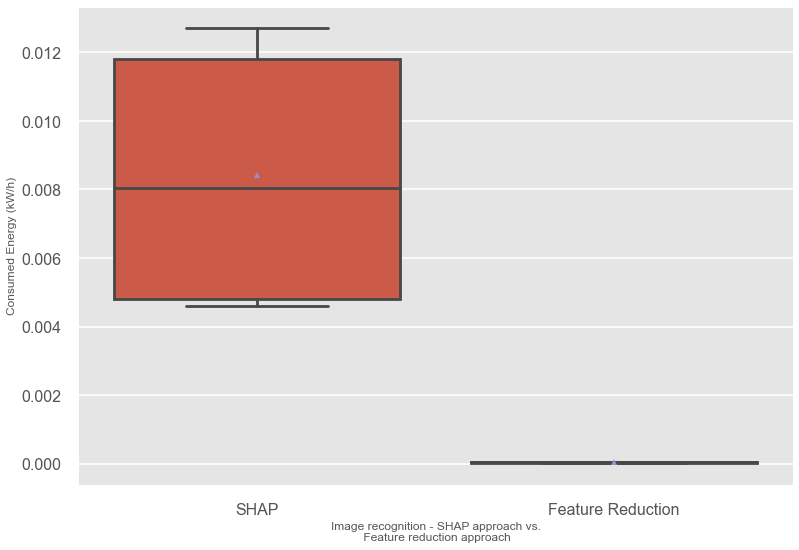

In [47]:
#visualize yolo5 data using boxplots:
y5combined = pd.concat([yolo5shapdata['energy_consumed'], yolo5reddata['energy_consumed']], axis=1, ignore_index=True, sort=False)
y5combined.columns =['SHAP', 'Feature Reduction']
print(y5combined)
sns.boxplot(data=y5combined, showmeans=True)
plt.xlabel('Image detection - SHAP approach vs.\n Feature reduction approach')
plt.ylabel('Consumed Energy (kW/h)')

In [48]:
#show hardware specifics for each model: 

print(gliomashapdata['cpu_model'].unique())
#gliomareddata
print(energyefficiencyshapdata['cpu_model'].unique())
#energyefficiencyreddata
print(yolo5shapdata['cpu_model'].unique())
#yolo5reddata

print("\n eubuntu=...3,1ghz...\n", "kmac=...2,2ghz...\n", "lwin=...3,7ghz...\n", "lmac=...2,9ghz...")

['Intel(R) Core(TM) i7-4770HQ CPU @ 2.20GHz'
 'Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz'
 '11th Gen Intel(R) Core(TM) i5-11300H @ 3.10GHz']
['11th Gen Intel(R) Core(TM) i5-11300H @ 3.10GHz'
 'Intel(R) Core(TM) i7-4770HQ CPU @ 2.20GHz'
 'Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz']
['11th Gen Intel(R) Core(TM) i5-11300H @ 3.10GHz'
 'Intel(R) Core(TM) i7-4770HQ CPU @ 2.20GHz'
 'Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz']

 eubuntu=...3,1ghz...
 kmac=...2,2ghz...
 lwin=...3,7ghz...
 lmac=...2,9ghz...


In [49]:
#select hardware specific rows from each dataframe and further compute the pvalues for all the different model and hardware settings:
gliomashapdata_from_kmac     = gliomashapdata[(gliomashapdata["cpu_model"] == 'Intel(R) Core(TM) i7-4770HQ CPU @ 2.20GHz')]
gliomareddata_from_kmac      = gliomareddata[(gliomareddata["cpu_model"]   == 'Intel(R) Core(TM) i7-4770HQ CPU @ 2.20GHz')]
                                          
gliomashapdata_from_lwin     = gliomashapdata[(gliomashapdata["cpu_model"] == 'Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz')]
gliomareddata_from_lwin      = gliomareddata[(gliomareddata["cpu_model"]   == 'Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz')]

gliomashapdata_from_eubuntu  = gliomashapdata[(gliomashapdata["cpu_model"] == '11th Gen Intel(R) Core(TM) i5-11300H @ 3.10GHz')] 
gliomareddata_from_eubuntu   = gliomareddata[(gliomareddata["cpu_model"]   == '11th Gen Intel(R) Core(TM) i5-11300H @ 3.10GHz')] 

#scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
print("Individual t-tests between SHAP and Feature Reduction models:")

#variance_sample1kmac = np.var(gliomashapdata_from_kmac['energy_consumed'])
#variance_sample2kmac = np.var(gliomareddata_from_kmac['energy_consumed'])
#variance_sample1lwin = np.var(gliomashapdata_from_lwin['energy_consumed'])
#variance_sample2lwin = np.var(gliomareddata_from_lwin['energy_consumed'])
#variance_sample1eubuntu = np.var(gliomashapdata_from_eubuntu['energy_consumed'])
#variance_sample2eubuntu = np.var(gliomareddata_from_eubuntu['energy_consumed'])

if stats.levene(gliomashapdata_from_kmac['energy_consumed'], 
                      gliomareddata_from_kmac['energy_consumed'],).pvalue > 0.05:
    print("p Value for glioma model on K's Mac (i7-4770HQ CPU @ 2.20GHz):", 
      stats.ttest_ind(gliomashapdata_from_kmac['energy_consumed'], 
                      gliomareddata_from_kmac['energy_consumed'],
                     equal_var=True).pvalue)
else:     # - welchs test is set under equal_var=False.")
    print("p Value for glioma model on K's Mac (i7-4770HQ CPU @ 2.20GHz), by welchs t-test for unequal var:", 
      stats.ttest_ind(gliomashapdata_from_kmac['energy_consumed'], 
                      gliomareddata_from_kmac['energy_consumed'],
                     equal_var=False).pvalue)

if stats.levene(gliomashapdata_from_eubuntu['energy_consumed'], 
                      gliomareddata_from_eubuntu['energy_consumed'],).pvalue > 0.05:
    print("p Value for glioma model on E's Ubuntu (i5-11300H @ 3.10GHz):", 
      stats.ttest_ind(gliomashapdata_from_eubuntu['energy_consumed'], 
                      gliomareddata_from_eubuntu['energy_consumed'],
                     equal_var=True).pvalue)
else:
    print("p Value for SHAP model on E's Ubuntu (i5-11300H @ 3.10GHz), by welchs t-test for unequal var:", 
      stats.ttest_ind(gliomashapdata_from_eubuntu['energy_consumed'], 
                      gliomareddata_from_eubuntun['energy_consumed'],
                     equal_var=False).pvalue)

if stats.levene(gliomashapdata_from_lwin['energy_consumed'], 
                      gliomareddata_from_lwin['energy_consumed'],).pvalue > 0.05:
    print("p Value for glioma model on L's Win (i7-8700K CPU @ 3.70GHz):", 
      stats.ttest_ind(gliomashapdata_from_lwin['energy_consumed'], 
                      gliomareddata_from_lwin['energy_consumed'],
                     equal_var=True).pvalue)
else:
    print("p Value for glioma model on L's Win (i7-8700K CPU @ 3.70GHz), by welchs t-test for unequal var:", 
      stats.ttest_ind(gliomashapdata_from_lwin['energy_consumed'], 
                      gliomareddata_from_lwin['energy_consumed'],
                     equal_var=False).pvalue)
    

Individual t-tests between SHAP and Feature Reduction models:
p Value for glioma model on K's Mac (i7-4770HQ CPU @ 2.20GHz): 0.005090174604241015
p Value for glioma model on E's Ubuntu (i5-11300H @ 3.10GHz): 0.6953380823348405
p Value for glioma model on L's Win (i7-8700K CPU @ 3.70GHz): 0.001032967916312492


In [50]:
energyefficiencyshapdata_from_eubuntu  = energyefficiencyshapdata[(energyefficiencyshapdata["cpu_model"] == '11th Gen Intel(R) Core(TM) i5-11300H @ 3.10GHz')] 
energyefficiencyreddata_from_eubuntu   = energyefficiencyreddata[(energyefficiencyreddata["cpu_model"]   == '11th Gen Intel(R) Core(TM) i5-11300H @ 3.10GHz')] 

energyefficiencyshapdata_from_kmac     = energyefficiencyshapdata[(energyefficiencyshapdata["cpu_model"] == 'Intel(R) Core(TM) i7-4770HQ CPU @ 2.20GHz')]
energyefficiencyreddata_from_kmac      = energyefficiencyreddata[(energyefficiencyreddata["cpu_model"]   == 'Intel(R) Core(TM) i7-4770HQ CPU @ 2.20GHz')]

energyefficiencyshapdata_from_lwin     = energyefficiencyshapdata[(energyefficiencyshapdata["cpu_model"] == 'Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz')]
energyefficiencyreddata_from_lwin      = energyefficiencyreddata[(energyefficiencyreddata["cpu_model"]   == 'Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz')]

if stats.levene(energyefficiencyshapdata_from_lwin['energy_consumed'], 
                      energyefficiencyreddata_from_lwin['energy_consumed'],).pvalue > 0.05:
    print("p Value for Energy Efficiency Model on L's Win (i7-8700K CPU @ 3.70GHz):", 
      stats.ttest_ind(energyefficiencyshapdata_from_lwin['energy_consumed'], 
                      energyefficiencyreddata_from_lwin['energy_consumed'], 
                      equal_var=True).pvalue)
else:
    print("p Value for Energy Efficiency Model on L's Win (i7-8700K CPU @ 3.70GHz), by welchs t-test for unequal var:", 
      stats.ttest_ind(energyefficiencyshapdata_from_lwin['energy_consumed'], 
                      energyefficiencyreddata_from_lwin['energy_consumed'],
                     equal_var=False).pvalue)
    
if stats.levene(energyefficiencyshapdata_from_eubuntu['energy_consumed'], 
                      energyefficiencyreddata_from_eubuntu['energy_consumed'],).pvalue > 0.05:
    print("p Value for Energy Efficiency Model on E's Ubuntu (i5-11300H @ 3.10GHz):", 
      stats.ttest_ind(a = energyefficiencyshapdata_from_eubuntu['energy_consumed'], 
                      b = energyefficiencyreddata_from_eubuntu['energy_consumed'],
                     equal_var=True).pvalue)
else:
    print("p Value for Energy Efficiency Model on E's Ubuntu (i5-11300H @ 3.10GHz), by welchs t-test for unequal var:", 
      stats.ttest_ind(energyefficiencyshapdata_from_eubuntu['energy_consumed'], 
                      energyefficiencyreddata_from_eubuntu['energy_consumed'],
                     equal_var=False).pvalue)

if stats.levene(energyefficiencyshapdata_from_kmac['energy_consumed'], 
                      energyefficiencyreddata_from_kmac['energy_consumed'],).pvalue > 0.05:
    print("p Value for Energy Efficiency Model on K's Mac (i7-4770HQ CPU @ 2.20GHz):", 
      stats.ttest_ind(a = energyefficiencyshapdata_from_kmac['energy_consumed'], 
                      b = energyefficiencyreddata_from_kmac['energy_consumed'],
                     equal_var=True).pvalue)
else:
    print("p Value for Energy Efficiency Model on K's Mac (i7-4770HQ CPU @ 2.20GHz), by welchs t-test for unequal var:", 
      stats.ttest_ind(energyefficiencyshapdata_from_kmac['energy_consumed'], 
                      energyefficiencyreddata_from_kmac['energy_consumed'],
                     equal_var=False).pvalue)
    

p Value for Energy Efficiency Model on L's Win (i7-8700K CPU @ 3.70GHz): 0.0015700725725297082
p Value for Energy Efficiency Model on E's Ubuntu (i5-11300H @ 3.10GHz): 0.023465038245639336
p Value for Energy Efficiency Model on K's Mac (i7-4770HQ CPU @ 2.20GHz): 0.15230068893969526


In [51]:
yolo5shapdata_from_eubuntu  = yolo5shapdata[(yolo5shapdata["cpu_model"] == '11th Gen Intel(R) Core(TM) i5-11300H @ 3.10GHz')] 
yolo5reddata_from_eubuntu   = yolo5reddata[(yolo5reddata["cpu_model"]   == '11th Gen Intel(R) Core(TM) i5-11300H @ 3.10GHz')] 

yolo5shapdata_from_kmac     = yolo5shapdata[(yolo5shapdata["cpu_model"] == 'Intel(R) Core(TM) i7-4770HQ CPU @ 2.20GHz')]
yolo5reddata_from_kmac      = yolo5reddata[(yolo5reddata["cpu_model"]   == 'Intel(R) Core(TM) i7-4770HQ CPU @ 2.20GHz')]

yolo5shapdata_from_lwin     = yolo5shapdata[(yolo5shapdata["cpu_model"] == 'Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz')]
yolo5reddata_from_lwin      = yolo5reddata[(yolo5reddata["cpu_model"]   == 'Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz')]

print("energy consumed values from lwin:", yolo5shapdata_from_lwin['energy_consumed'],
       yolo5reddata_from_lwin['energy_consumed'],
      "energy consumed values from kmac:",yolo5shapdata_from_kmac['energy_consumed'],
      yolo5reddata_from_kmac['energy_consumed'],
      "energy consumed values from eubuntu:",yolo5shapdata_from_eubuntu['energy_consumed'],   
      yolo5reddata_from_eubuntu['energy_consumed'])

if stats.levene(yolo5shapdata_from_eubuntu['energy_consumed'], 
                      yolo5reddata_from_eubuntu['energy_consumed']).pvalue > 0.05:
    print("p Value for YOLOv5 Model on E's Ubuntu (i5-11300H @ 3.10GHz):", 
      stats.ttest_ind(yolo5shapdata_from_eubuntu['energy_consumed'], 
                      yolo5reddata_from_eubuntu['energy_consumed'],
                     equal_var=True).pvalue)
else: 
    print("p Value for YOLOv5 Model on E's Ubuntu (i5-11300H @ 3.10GHz), by Welchs t-test due to unequal var:", 
      stats.ttest_ind(yolo5shapdata_from_eubuntu['energy_consumed'], 
                      yolo5reddata_from_eubuntu['energy_consumed'],
                     equal_var=False).pvalue)
    
if stats.levene(yolo5shapdata_from_kmac['energy_consumed'], 
                      yolo5reddata_from_kmac['energy_consumed']).pvalue > 0.05:
    print("p Value for YOLOv5 Model on K's Mac (i7-4770HQ CPU @ 2.20GHz):", 
      stats.ttest_ind(yolo5shapdata_from_kmac['energy_consumed'], 
                      yolo5reddata_from_kmac['energy_consumed'],
                     equal_var=True).pvalue)  
else:
    print("p Value for YOLOv5 Model on K's Mac (i7-4770HQ CPU @ 2.20GHz), by Welchs t-test due to unequal var:", 
      stats.ttest_ind(yolo5shapdata_from_kmac['energy_consumed'], 
                      yolo5reddata_from_kmac['energy_consumed'],
                     equal_var=False).pvalue)
    
if stats.levene(yolo5shapdata_from_lwin['energy_consumed'], 
                      yolo5reddata_from_lwin['energy_consumed']).pvalue > 0.05:
    print("p Value for YOLOv5 Model on L's Win (i7-8700K CPU @ 3.70GHz):", 
      stats.ttest_ind(yolo5shapdata_from_lwin['energy_consumed'], 
                      yolo5reddata_from_lwin['energy_consumed'],
                     equal_var=True).pvalue)
else:
    print("p Value for YOLOv5 Model on L's Win (i7-8700K CPU @ 3.70GHz), by Welchs t-test due to unequal var:", 
      stats.ttest_ind(yolo5shapdata_from_lwin['energy_consumed'], 
                      yolo5reddata_from_lwin['energy_consumed'],
                     equal_var=False).pvalue)

energy consumed values from lwin: 6   0.0126362852699779
7   0.0127054372805152
8   0.0118095432083353
Name: energy_consumed, dtype: float64 6   0.00003623374593687692
7   0.00004899093702464901
8   0.00003845941563417148
Name: energy_consumed, dtype: float64 energy consumed values from kmac: 3    0.008602629500942
4   0.0079949250742151
5   0.0080472105922803
Name: energy_consumed, dtype: float64 3   0.00003875268504898306
4   0.00004239325619520413
5   0.00005260523930706912
Name: energy_consumed, dtype: float64 energy consumed values from eubuntu: 0   0.0046808496357055
1   0.0045861826727418
2   0.0048090184000464
Name: energy_consumed, dtype: float64 0   0.000015107363338750994
1   0.000013225098896923677
2    0.00001353599734614526
Name: energy_consumed, dtype: float64
p Value for YOLOv5 Model on E's Ubuntu (i5-11300H @ 3.10GHz): 2.175222134169076e-07
p Value for YOLOv5 Model on K's Mac (i7-4770HQ CPU @ 2.20GHz): 1.9190885917981687e-06
p Value for YOLOv5 Model on L's Win (i7-8700

In [52]:
pvalues = [stats.ttest_ind(gliomashapdata_from_kmac['energy_consumed'], 
                      gliomareddata_from_kmac['energy_consumed'],
                     equal_var=True).pvalue,
           stats.ttest_ind(gliomashapdata_from_eubuntu['energy_consumed'], 
                      gliomareddata_from_eubuntu['energy_consumed'],
                     equal_var=True).pvalue,
           stats.ttest_ind(gliomashapdata_from_lwin['energy_consumed'], 
                      gliomareddata_from_lwin['energy_consumed'],
                     equal_var=True).pvalue,
           stats.ttest_ind(energyefficiencyshapdata_from_lwin['energy_consumed'], 
                      energyefficiencyreddata_from_lwin['energy_consumed'], 
                      equal_var=True).pvalue,
           stats.ttest_ind(a = energyefficiencyshapdata_from_eubuntu['energy_consumed'], 
                      b = energyefficiencyreddata_from_eubuntu['energy_consumed'],
                     equal_var=True).pvalue,
           stats.ttest_ind(a = energyefficiencyshapdata_from_kmac['energy_consumed'], 
                      b = energyefficiencyreddata_from_kmac['energy_consumed'],
                     equal_var=True).pvalue,
           stats.ttest_ind(yolo5shapdata_from_eubuntu['energy_consumed'], 
                      yolo5reddata_from_eubuntu['energy_consumed'],
                     equal_var=True).pvalue,
           stats.ttest_ind(yolo5shapdata_from_kmac['energy_consumed'], 
                      yolo5reddata_from_kmac['energy_consumed'],
                     equal_var=True).pvalue,
           stats.ttest_ind(yolo5shapdata_from_lwin['energy_consumed'], 
                      yolo5reddata_from_lwin['energy_consumed'],
                     equal_var=True).pvalue
          ]

hardwaresettings = ['INDEX PLACEHOLDER 0', 'Glioma on i5-11300H @ 3.10GHz', 
                    'Glioma Classifier on i7-4770HQ CPU @ 2.20GHz', 
                    'Glioma Classifier on i7-8700K CPU @ 3.70GHz', 
                    'EnergyEfficiency on i5-11300H @ 3.10GHz', 
                    'EnergyEfficiency on i7-4770HQ CPU @ 2.20GHz', 
                    'EnergyEfficiency on i7-8700K CPU @ 3.70GHz',
                    'YOLOv5 on i5-11300H @ 3.10GHz', 
                    'YOLOv5 on i7-4770HQ CPU @ 2.20GHz', 
                    'YOLOv5 on i7-8700K CPU @ 3.70GHz',
                   ]

print(pvalues)
print(hardwaresettings)

[0.005090174604241015, 0.6953380823348405, 0.001032967916312492, 0.0015700725725297082, 0.023465038245639336, 0.15230068893969526, 2.175222134169076e-07, 1.9190885917981687e-06, 1.7680010426281698e-06]
['INDEX PLACEHOLDER 0', 'Glioma on i5-11300H @ 3.10GHz', 'Glioma Classifier on i7-4770HQ CPU @ 2.20GHz', 'Glioma Classifier on i7-8700K CPU @ 3.70GHz', 'EnergyEfficiency on i5-11300H @ 3.10GHz', 'EnergyEfficiency on i7-4770HQ CPU @ 2.20GHz', 'EnergyEfficiency on i7-8700K CPU @ 3.70GHz', 'YOLOv5 on i5-11300H @ 3.10GHz', 'YOLOv5 on i7-4770HQ CPU @ 2.20GHz', 'YOLOv5 on i7-8700K CPU @ 3.70GHz']


                               hardwaresettings  pvalues
0                 Glioma on i5-11300H @ 3.10GHz  0.00509
1  Glioma Classifier on i7-4770HQ CPU @ 2.20GHz 0.695338
2   Glioma Classifier on i7-8700K CPU @ 3.70GHz 0.001033
3       EnergyEfficiency on i5-11300H @ 3.10GHz  0.00157
4   EnergyEfficiency on i7-4770HQ CPU @ 2.20GHz 0.023465
5    EnergyEfficiency on i7-8700K CPU @ 3.70GHz 0.152301
6                 YOLOv5 on i5-11300H @ 3.10GHz       0.
7             YOLOv5 on i7-4770HQ CPU @ 2.20GHz 0.000002
8              YOLOv5 on i7-8700K CPU @ 3.70GHz 0.000002


Text(0.5, 1.0, 'pvalues for the different models on different hardwaresettings \n(only those system with pvalues under 0.05 show significant differences between shap and feature reduction)')

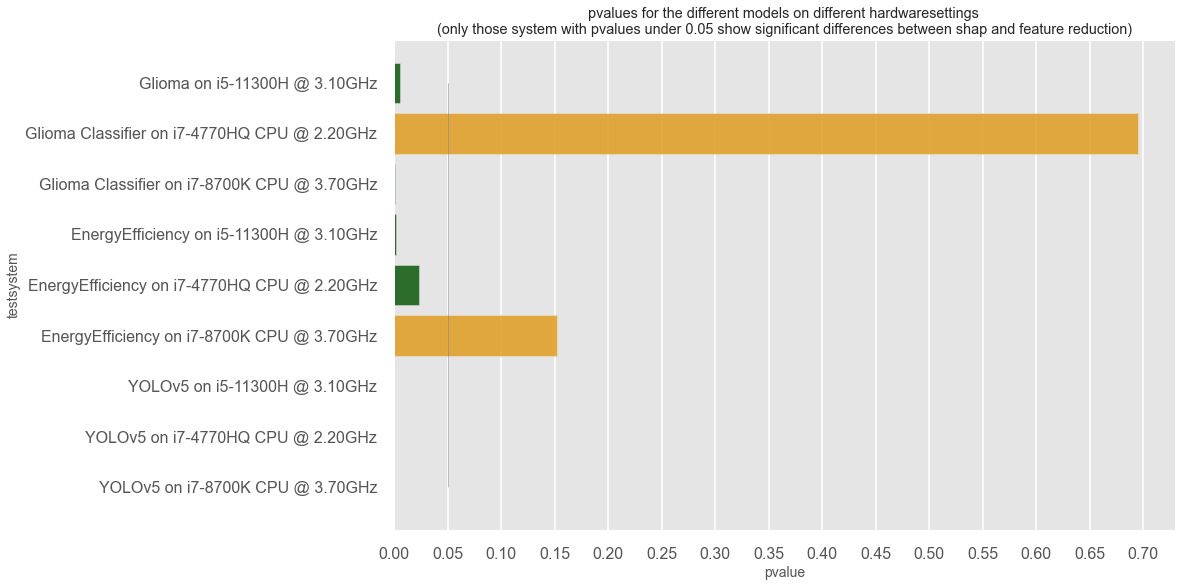

In [53]:
# create plot with pvalues

pdf = pd.DataFrame()
pdf["hardwaresettings"] = hardwaresettings[1:]
pdf["pvalues"] = np.round(pvalues,6)
print(pdf)

plt.figure(figsize=(14,9))
bins=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,0.55, 0.6, 0.65, 0.7]
ax1 = sns.barplot(data=pdf, x="pvalues", y="hardwaresettings", 
                  palette=["darkgreen","orange","darkgreen","darkgreen","darkgreen","orange","darkgreen"], 
                  alpha=0.85)
ax1.vlines(x=0.05, ymin=0, ymax=8, linewidth=.5, color='grey')
plt.xticks(bins)

plt.xlabel('pvalue', size=14)
plt.ylabel('testsystem', size=14)
plt.title("pvalues for the different models on different hardwaresettings \n(only those system with pvalues under 0.05 show significant differences between shap and feature reduction)")


C:\Users\Schokine\AppData\Local\Temp/ipykernel_18132/3002730734.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(hardwaresettings)


Text(0.5, 1.0, 'pvalues for the different models on different hardwaresettings')

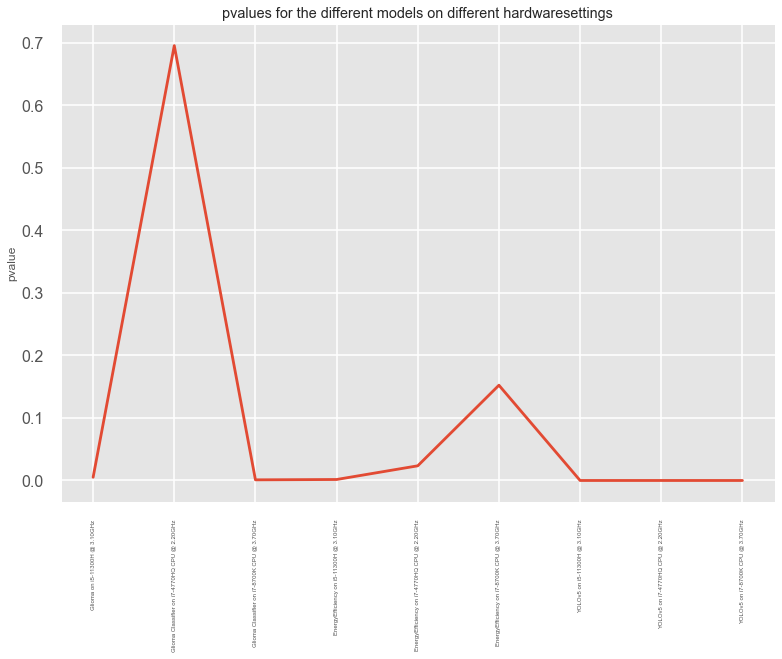

In [54]:
# create lineplot with pvalues
ax = sns.lineplot(data = pvalues)
ax.set_xticklabels(hardwaresettings)
#plt.xlabel('hardware specific model')
plt.xticks(rotation=90, size=6)
plt.ylabel('pvalue')
plt.title("pvalues for the different models on different hardwaresettings")


Text(0, 0.5, '')

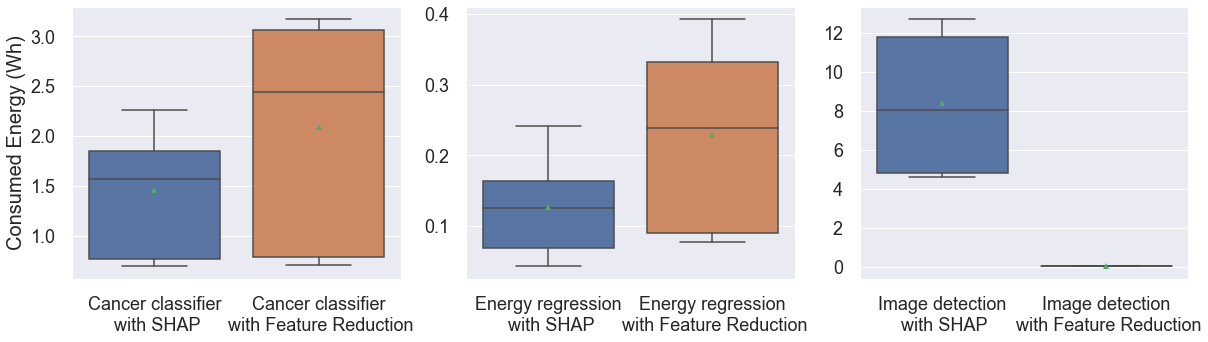

In [56]:
#make another plot with ttest results and sns boxplots from above
#sns.set(
#        style="ticks",                   # The 'ticks' style
#        rc={"figure.figsize": (6, 9),      # width = 6, height = 9
#            "figure.facecolor": "ivory",  # Figure colour
#            "axes.facecolor": "dark"})  # Axes colour
sns.set_theme()
sns.axes_style("darkgrid")


# Box plot
#>>> b = sns.boxplot(data = gliomashapdata,           
#                    x = "energy_consumed",       # x axis column from data
#                    y = "index",       # y axis column from data
#                    width = 0.4,        # The width of the boxes
#                    color = "skyblue",  # Box colour
#                    linewidth = 2,      # Thickness of the box lines
#                    showfliers = False)  # Sop showing the fliers
# Strip plot
#>>> b = sns.stripplot(data = gliomareddata,          
#                      x = "energy_consumed",      # x axis column from data
#                      y = "index",      # y axis column from data
#                      color = "crimson", # Colours the dots
#                      linewidth = 1,     # Dot outline width
#                      alpha = 0.4)       # Makes them transparent
# Set the y axis and font size
#>>> b.set_ylabel("Signal", fontsize = 14)
## Set the x axis label and font size
#>>> b.set_xlabel("Region", fontsize = 14)
## Set the plot title with the pval variable and font size
#>>> b.set_title("p-value = " + str(pval), fontsize = 16)
## Remove axis spines
#>>> sns.despine(offset = 5, trim = True)
## Show the figure
#>>> b.get_figure();


fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5)) #, sharey=True)
#plt.tight_layout()

#visualize glioma data using boxplots:
eg1 = gliomashapdata['energy_consumed'].apply(lambda x: x*1000)
eg2 = gliomareddata['energy_consumed'].apply(lambda x: x*1000)
gcombined = pd.concat([eg1, eg2], axis=1, ignore_index=True, sort=False)
gcombined.columns =['Cancer classifier\n with SHAP', 'Cancer classifier\n with Feature Reduction']
#print(gcombined)
sns.boxplot(data=gcombined, showmeans=True, ax=ax1)
#plt.xlabel('Glioma classifier - SHAP approach vs.\n Feature reduction approach')
#plt.ylabel('Consumed Energy (Wh)')

#visualize energy efficiency data using boxplots:
ee1 = energyefficiencyshapdata['energy_consumed'].apply(lambda x: x*1000)
ee2 = energyefficiencyreddata['energy_consumed'].apply(lambda x: x*1000)
eecombined = pd.concat([ee1, ee2], axis=1, ignore_index=True, sort=False)
eecombined.columns =['Energy regression\n with SHAP', 'Energy regression\n with Feature Reduction']
#print(eecombined)
sns.boxplot(data=eecombined, showmeans=True, ax=ax2)
#plt.xlabel('Energy Efficiency Model - SHAP approach vs.\n Feature reduction approach')
#plt.ylabel('Consumed Energy (Wh)')

#visualize yolo5 data using boxplots:
ey1 = yolo5shapdata['energy_consumed'].apply(lambda x: x*1000)
ey2 = yolo5reddata['energy_consumed'].apply(lambda x: x*1000)
y5combined = pd.concat([ey1, ey2], axis=1, ignore_index=True, sort=False)
y5combined.columns = ['Image detection\n with SHAP', 'Image detection\n with Feature Reduction']
#print(y5combined)
sns.boxplot(data=y5combined, showmeans=True, ax=ax3)
#plt.xlabel('Yolo5 Model - SHAP approach vs.\n Feature reduction approach')
#plt.ylabel('Consumed Energy (Wh)')

ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
ax3.tick_params(labelsize=18)
ax1.set_ylabel('Consumed Energy (Wh)', fontsize='20')
ax2.set_ylabel('')  # remove y label, but keep ticks
ax3.set_ylabel('')  # remove y label, but keep ticks
